<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망으로 IMDB 리뷰 분류하기
* 순차 데이터 
  
  텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터이다. 대표적으로 글, 대화, 일자별 날씨 등이 있다.
* 순환 신경망
  
  순차 데이터에 잘맞는 인공신경망의 한 종류이다. 순환층을 **셀**이라고 부르고 셀의 출력을 **은닉 상태**라고 부른다. 은닉상태는 다음층으로 전달될 뿐만 아니라 셀이 다음 타임스텝의 데이터를 처리할 때 재사용된다.
* 말뭉치

  자연어 처리에서 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터셋을 일컫는다.
* 토큰

  텍스트에서 공백으로 구분되는 문자열을 말한다. 종종 소문자로 변환하고 구둣점은 삭제한다.

* 원-핫 인코딩

  어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터이다. 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘사전 크기의 벡터가 만들어진다.

* 단어 임베딩

  정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환한다. 밀집 벡터는 단어 사이의 관계를 표현할 수 있어서 자연어 처리에서 좋은 성능을 발휘한다.

In [3]:
from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)


17473536/17464789 [==============================] - 0s 0us/step


* 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용

In [4]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


* 배열이 1차원인 이유

  imdb 리뷰텍스트의 길이는 제각각임

  ->고정된 2차원 배열에 담기보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [5]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


* 첫번째 리뷰의 길이는 218개의 토큰으로 이루어짐
* 두번째 리뷰의 길이는 189개의 토큰으로 이루어짐

-> 리뷰의 길이는 제각각이다.




In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


* 첫번째 리뷰에 담긴 내용 (218개의 토큰)

* 앞서 num_words를 500으로 설정했기에 어휘사전에 포함되지않은 단어는 2로 표시됨
 
**※ 0 : 패딩 / 1 : 시작 / 2 : 어휘사전에 없는 단어**

In [7]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


* 해결할 문제는 리뷰가 부정(0)인지 긍정(1)인지 판단하는 것이다. (이진분류)

In [8]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

* 훈련세트에서 검증세트 20% 로 떼어냄
# 훈련세트 파악하기

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


* 리뷰의 평균 단어 개수는 239개, 중간값은 178개

-> 한쪽으로 치우침을 예상할 수 있다.


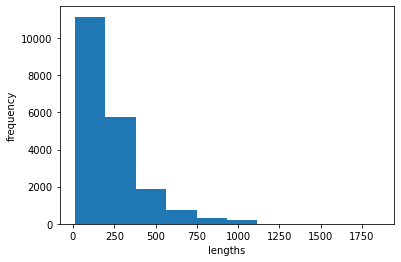

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

* 대부분의 리뷰 길이는 300미만
* 평균이 중간값보다 높은 이유는 1000개 이상의 단어도 있기때문이다.

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)

* 대부분의 리뷰길이가 짧아서 중간값보다 훨씬 짧은 100개의 단어만 사용해보자
* pad_sequence로 시퀀스의 길이를 맞춰줄 수 있음 ( 길이를 잘라내거나 패딩으로 추가하거나)

In [14]:
print(train_seq.shape)

(20000, 100)


In [15]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


* 샘플 앞뒤에 패딩이 없는 것으로 보아 첫번째 리뷰는 100개의 단어 이상으로 이루어져있었음을 예측가능

In [17]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


* 실제 첫번째 리뷰의 마지막 10개의 토큰을 확인해봄
* train_seq 의 마지막 10개의 토큰과 일치 

  -> 길이를 맞추기위해 앞쪽을 자름
* 일반적으로 시퀀스의 뒷부분이 더 유용한 정보가 많다고 생각하기에 앞쪽을 슬라이싱함
* 만약, 뒤쪽을 자르고 싶으면 pad_sequences() 함수의 **truncating='post'**로 설정하면됨

In [19]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


* 앞쪽에 0으로 패딩처리되있는 것을 보아 6번째 리뷰는 단어가 100개가 안됨
* 만약 뒤쪽에 패딩을 추가하고싶으면 pad_sequences() 함수의 **padding='post'**로 설정하면 됨

In [20]:
val_seq = pad_sequences(val_input,maxlen=100)

* 검증데이터의 길이도 100으로 맞춰줌
# 순환신경망 만들기

In [22]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))

* simpleRNN의 활성화함수는 tanh로 기본값 그대로 사용했다.
* input_shape=(100,500)인 이유
  * 100은 샘플의 길이를 100으로 맞췄기때문이다.
  * 500은 imdb.load_data()에서 500개의 단어만 사용하도록 지정했기때문이다.
   즉, 어휘사전에는 고유한 500개의 단어만 있음!!
    * 이를 원핫인코딩으로 표현하려면 배열의 길이가 500이여야함 
    * 500의 길이에 한개만 1 나머지는 0으로 표현

In [23]:
train_oh = keras.utils.to_categorical(train_seq)

* keras.utils.to_categorical을 이용해 원핫인코딩을 자동으로 만들어줌

In [24]:
print(train_oh.shape)

(20000, 100, 500)


train_seq ->      train_oh

(200000,100) -> (200000,100,500)

In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


* 첫번째 리뷰의 첫번째 단어가 원핫인코딩이 잘되었는지 확인

In [26]:
print(np.sum(train_oh[0][0]))

1.0


* 원핫인코딩을 하면 1 한개에 나머지는 전부다 0이기때문에 sum을 하면 1이 나와야함

In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


# 순환신경망 훈련하기

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 44ms/step - loss: 0.7028 - accuracy: 0.4964 - val_loss: 0.7005 - val_accuracy: 0.4924
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6976 - accuracy: 0.5058 - val_loss: 0.6970 - val_accuracy: 0.5024
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6936 - accuracy: 0.5176 - val_loss: 0.6938 - val_accuracy: 0.5106
Epoch 4/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6896 - accuracy: 0.5340 - val_loss: 0.6898 - val_accuracy: 0.5344
Epoch 5/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6772 - accuracy: 0.5817 - val_loss: 0.6691 - val_accuracy: 0.6056
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6563 - accuracy: 0.6387 - val_loss: 0.6533 - val_accuracy: 0.6346
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6375 - accuracy: 0.6671 - val_loss: 0.6326 - val_ac

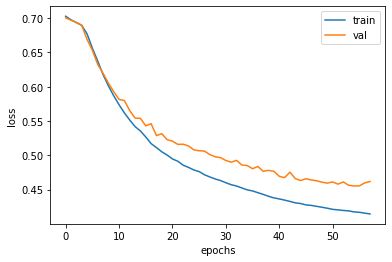

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [31]:
print(train_seq.nbytes,train_oh.nbytes)

8000000 4000000000


* 토큰 한개를 500차원으로 늘렸기때문에 대략 500배 커짐!!ㅠㅠ
* 원핫인코딩 대신 더 좋은 단어 표현 방법 **단어 임베딩**사용가능
# 단어 임베딩 사용하기

In [34]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

Embedding
* 첫번째 매개변수 500은 어휘사전의 크기이다.
* 두번째 매개변수 16은 임베딩 벡터의 크기이다.
* 세번째 매개변수 input_length은 입력 시퀀스의 길이이다.
 

In [35]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model2.fit(train_seq,train_target,epochs=100,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
625/625 [==============================] - 15s 20ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6918 - val_accuracy: 0.5222
Epoch 2/100
625/625 [==============================] - 21s 33ms/step - loss: 0.6897 - accuracy: 0.5396 - val_loss: 0.6906 - val_accuracy: 0.5248
Epoch 3/100
625/625 [==============================] - 21s 34ms/step - loss: 0.6863 - accuracy: 0.5541 - val_loss: 0.6897 - val_accuracy: 0.5264
Epoch 4/100
625/625 [==============================] - 16s 26ms/step - loss: 0.6825 - accuracy: 0.5638 - val_loss: 0.6892 - val_accuracy: 0.5314
Epoch 5/100
625/625 [==============================] - 20s 32ms/step - loss: 0.6781 - accuracy: 0.5779 - val_loss: 0.6887 - val_accuracy: 0.5330
Epoch 6/100
625/625 [==============================] - 15s 25ms/step - loss: 0.6690 - accuracy: 0.6094 - val_loss: 0.6722 - val_accuracy: 0.5976
Epoch 7/100
625/625 [==============================] - 12s 19ms/step - loss: 0.6438 - accuracy: 0.6799 - val_loss: 0.6421 - val_ac

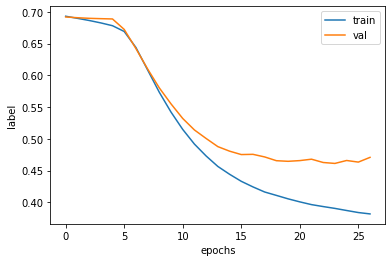

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('label')
plt.legend(['train','val'])
plt.show()